In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
import pubchempy as pcp
import json
from matplotlib import pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

import requests
from bs4 import BeautifulSoup
import re
import time

import pickle

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [2]:
from extract_data import get_dataset

In [3]:
dataset = get_dataset()

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridine . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 3-cyanopyridine . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= 4-cyanopyridi

In [4]:
dataset[0]

,0,1,2,3,4,5,6,7,8,9,...,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888
0,0.0,0.0,16.0,17.0,29.0,19.0,0.0,0.0,4.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,0.0,2.0,0.0,0.0,16.0,6.0,0.0,0.0,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,0.0,0.0,16.0,17.0,29.0,19.0,0.0,0.0,4.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,0.0,2.0,0.0,0.0,16.0,6.0,0.0,0.0,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,1.0,0.0,6.0,6.0,20.0,12.0,0.0,0.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,2.0,0.0,0.0,0.0,26.0,12.0,0.0,0.0,4.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2468,0.0,0.0,6.0,6.0,14.0,9.0,0.0,0.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2469,2.0,0.0,0.0,0.0,29.0,13.0,0.0,0.0,4.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2470,2.0,0.0,0.0,0.0,23.0,11.0,0.0,0.0,4.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [5]:
def get_smiles(chemical_name):
    try:
        # Search for the chemical name in PubChem
        compounds = pcp.get_compounds(chemical_name, 'name')
        if compounds:
            # Return the first compound's SMILES
            return compounds[0].canonical_smiles
        else:
            return "Chemical name not found"
    except Exception as e:
        return str(e)


In [6]:
df_mn = pd.read_excel(r'data/SMILES.xlsx')
molnames = np.unique([i.strip() for i in df_mn.iloc[:,:3]['API'].tolist()+df_mn.iloc[:,:3]['Coformer'].tolist()])

molname_dictionary = {}
for i in range(len(molnames)):
    molname_dictionary[molnames[i]] = get_smiles(molnames[i])
    # print(f'{molnames[i]} done.')
    print(f'{round(((i+1)/len(molnames))*100,2)}% completed...')



print('\n'.join([i for i in molname_dictionary if molname_dictionary[i]=='Chemical name not found']))


with open('molname_dictionary.txt','w') as f:
    molname_dictionary = f.write(json.dumps(molname_dictionary))

0.17% completed...


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/pubchempy.py:563: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if self.charge is not 0:
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/pubchempy.py:563: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if self.charge is not 0:
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/pubchempy.py:563: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if self.charge is not 0:
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/pubchempy.py:563: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if self.charge is not 0:
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/pubchempy.py:563: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if self.charge is not 0:
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/pubchempy.py:563: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if self.charge is not 0

KeyboardInterrupt: 

In [7]:
df_mn = pd.read_excel(r'data/SMILES.xlsx')
molnames = np.unique([i.strip() for i in df_mn.iloc[:,:3]['API'].tolist()+df_mn.iloc[:,:3]['Coformer'].tolist()])

In [8]:



with open('data/molname_dictionary.txt','r') as f:
    molname_dictionary = json.loads(f.read())

final_molnames = np.unique([i for i in molnames if (i in molname_dictionary and molname_dictionary[i]!='Chemical name not found')])
final_molnames_lower_unique = np.unique([i.lower() for i in final_molnames])

molname_dictionary_withoutduplicates = {}
for i in molname_dictionary:
    if i.lower() not in molname_dictionary_withoutduplicates:
        if i.lower() in final_molnames_lower_unique:
            molname_dictionary_withoutduplicates[i.lower()] = molname_dictionary[i]

mol_list = []
# for i in final_molnames:
for i in final_molnames_lower_unique:
    #mol_list.append(molname_dictionary[i])
    mol_list.append(molname_dictionary_withoutduplicates[i.lower()])



calc = Calculator(descriptors, ignore_3D=True)
mols = [Chem.MolFromSmiles(smi) for smi in mol_list]

# # the below code is to be removed after fixing the error

# valid_mols = []
# invalid_smiles = []

# for smi in mol_list:
#     mol = Chem.MolFromSmiles(smi)
#     if mol is None:
#         invalid_smiles.append(smi)
#         print(smi)
#     else:
#         valid_mols.append(mol)

# if invalid_smiles:
#     print("Invalid SMILES:", invalid_smiles)
# mols = valid_mols

# # the above code is to be removed after fixing the error

df_u = calc.pandas(mols)




df_u['mol_name'] = mol_list

all_values = []
for i in range(len(df_mn)):
    api = df_mn.iloc[i,0].strip()
    coformer = df_mn.iloc[i,1].strip()
    output_raw = df_mn.iloc[i,2]
    if api.lower() in molname_dictionary_withoutduplicates and coformer.lower() in molname_dictionary_withoutduplicates:
        api_values = df_u.loc[df_u.iloc[:,-1]==molname_dictionary_withoutduplicates[api.lower()],:].values
        coformer_values = df_u.loc[df_u.iloc[:,-1]==molname_dictionary_withoutduplicates[coformer.lower()],:].values
        if 'yes' in output_raw.lower():
            output = 1
        elif 'no' in output_raw.lower():
            output = 0
        else:
            print('some problem occurred.')
        all_values.append([api_values,coformer_values,output])
    else:
        print('Either api or coformer not found.', 'API=',api,'. Coformer=',coformer)


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridin

In [9]:
swiss_input_coformers = r"""B(C1=CC=C(C=C1)C=O)(O)O
C(=CC(=O)O)C(=O)O
C(=O)(C(=O)O)O
C(=O)(N)N
C(=S)(N)N
C(C(=O)N)C(=O)N
C(C(=O)N)O
C(C(=O)O)C(=O)O
C(C(=O)O)C(CC(=O)O)(C(=O)O)O
C(C(=O)O)N
C(C(=O)O)O
C(C(C(=O)O)N)C(=O)N
C(C(C(=O)O)N)C(=O)O
C(C(C(=O)O)O)(C(=O)O)O
C(C(C(=O)O)O)C(=O)O
C(C(C(C(=O)O)O)C(=O)O)C(=O)O
C(C(C(C(C(CO)O)O)O)O)O
C(C(C1C(=C(C(=O)O1)O)O)O)O
C(C(CO)(CO)N)O
C(C1C(C(C(C(O1)O)O)O)O)O
C(C1C(C(C(C(O1)OC2(C(C(C(O2)CO)O)O)CO)O)O)O)O
C(C1C(C(C(C(O1)OC2C(OC(C(C2O)O)O)CO)O)O)O)O
C(C1C(C(C(C(O1)OC2C(OC(C2O)(CO)O)CO)O)O)O)O
C(CC(=O)N)C(=O)N
C(CC(=O)N)C(C(=O)O)N
C(CC(=O)O)C(=O)C(=O)O
C(CC(=O)O)C(=O)O
C(CC(=O)O)C(C(=O)O)N
C(CC(=O)O)CC(=O)O
C(CC(=O)O)CN
C(CC(C(=O)O)N)CN=C(N)N
C(CCC(=O)O)CC(=O)O
C(CCC(=O)O)CCC(=O)O
C(CCCC(=O)O)CCC(=O)O
C(CCCC(=O)O)CCCC(=O)O
C(CCCCC(=O)O)CCCC(=O)O
C(CCCCCC(=O)O)CCCCC(=O)O
C(CCN)CC(C(=O)O)N
C(CO)N
C(CS(=O)(=O)O)S(=O)(=O)O
C1(=C(C(=C(C(=C1F)F)F)F)F)C(=O)O
C1(=C(C(=O)C(=C(C1=O)Br)O)Br)O
C1(=NC(=NC(=N1)N)N)N
C1(C(C(OC(C1O)O)C(=O)O)O)O
C1=C(C(=C(C(=C1F)F)F)F)C(=O)O
C1=C(C(=CC(=C1C#N)C#N)C#N)C#N
C1=C(C=C(C(=C1C(=O)O)O)[N+](=O)[O-])[N+](=O)[O-]
C1=C(C=C(C(=C1F)F)F)C(=O)O
C1=C(C=C(C(=C1O)C(=O)O)O)O
C1=C(C=C(C(=C1O)O)O)C(=O)O
C1=C(C=C(C(=C1O)O)O)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O
C1=C(C=C(C=C1C(=O)O)C(=O)O)C(=O)O
C1=C(C=C(C=C1C(=O)O)[N+](=O)[O-])C(=O)O
C1=C(C=C(C=C1O)O)C(=O)O
C1=C(C=C(C=C1O)O)O
C1=C(C=C(C=C1[N+](=O)[O-])[N+](=O)[O-])C(=O)O
C1=C(C=NC(=C1Br)N)Br
C1=C(C=NN1)Br
C1=C(C=NN1)I
C1=C(N=C(N=C1Cl)N)N
C1=C(NC(=O)N=C1)N
C1=C(NC=N1)CC(C(=O)O)N
C1=C(NN=C1C(=O)O)C(=O)O
C1=CC(=C(C(=C1)F)F)C(=O)O
C1=CC(=C(C(=C1)O)C(=O)O)O
C1=CC(=C(C(=C1)O)O)C(=O)O
C1=CC(=C(C(=C1)O)O)O
C1=CC(=C(C(=C1)[N+](=O)[O-])C(=O)O)C(=O)O
C1=CC(=C(C=C1C(=O)O)O)O
C1=CC(=C(C=C1C(=O)O)[N+](=O)[O-])Cl
C1=CC(=C(C=C1C(=O)O)[N+](=O)[O-])F
C1=CC(=C(C=C1C(=O)O)[N+](=O)[O-])N
C1=CC(=C(C=C1C(=O)O)[N+](=O)[O-])O
C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
C1=CC(=C(C=C1C=CC(=O)O)O)O
C1=CC(=C(C=C1CCC(=O)O)O)O
C1=CC(=C(C=C1Cl)C(=O)O)O
C1=CC(=C(C=C1F)C(=O)O)F
C1=CC(=C(C=C1F)C(=O)O)O
C1=CC(=C(C=C1N)O)C(=O)O
C1=CC(=C(C=C1N)[N+](=O)[O-])F
C1=CC(=C(C=C1O)C(=O)O)O
C1=CC(=C(C=C1O)O)C(=O)O
C1=CC(=C(C=C1[N+](=O)[O-])C(=O)O)F
C1=CC(=C(C=C1[N+](=O)[O-])Cl)C(=O)O
C1=CC(=C(C=C1[N+](=O)[O-])Cl)N
C1=CC(=C(C=C1[N+](=O)[O-])Cl)NC(=O)C2=C(C=CC(=C2)Cl)O
C1=CC(=C(C=C1[N+](=O)[O-])N)Cl
C1=CC(=CC(=C1)C#N)C#N
C1=CC(=CC(=C1)C(=O)O)C(=O)O
C1=CC(=CC(=C1)Cl)C(=O)O
C1=CC(=CC(=C1)N)C(=O)N
C1=CC(=CC(=C1)N)C(=O)O
C1=CC(=CC(=C1)O)C#N
C1=CC(=CC(=C1)O)C(=O)N
C1=CC(=CC(=C1)O)C(=O)O
C1=CC(=CC(=C1)O)O
C1=CC(=CC(=C1)[N+](=O)[O-])C(=O)O
C1=CC(=CC=C1C#N)C#N
C1=CC(=CC=C1C#N)O
C1=CC(=CC=C1C(=O)N)N
C1=CC(=CC=C1C(=O)N)O
C1=CC(=CC=C1C(=O)N)[N+](=O)[O-]
C1=CC(=CC=C1C(=O)O)C(=O)O
C1=CC(=CC=C1C(=O)O)F
C1=CC(=CC=C1C(=O)O)N
C1=CC(=CC=C1C(=O)O)O
C1=CC(=CC=C1C(=O)O)[N+](=O)[O-]
C1=CC(=CC=C1C2=CC=C(C=C2)O)O
C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O
C1=CC(=CC=C1C=CC(=O)O)O
C1=CC(=CC=C1CC(C(=O)O)N)O
C1=CC(=CC=C1CCC(=O)O)O
C1=CC(=CC=C1N)S(=O)(=O)C2=CC=C(C=C2)N
C1=CC(=CC=C1N)[N+](=O)[O-]
C1=CC(=CC=C1O)O
C1=CC(=CC=C1[N+](=O)[O-])O
C1=CC(=CN=C1)C#N
C1=CC(=CN=C1)C(=O)N
C1=CC(=CN=C1)C(=O)O
C1=CC(=CN=C1)N
C1=CC(=CN=C1)O
C1=CC(=NC(=C1)C(=O)O)C(=O)O
C1=CC(=NC(=C1)N)N
C1=CC(=NC=C1Cl)N
C1=CC(=O)NC=C1
C1=CC2=C(C=CC(=C2)O)C=C1C(=O)O
C1=CC2=C(C=CN=C2)C(=C1)O
C1=CC2=NNN=C2C=C1
C1=CC=C(C(=C1)C(=O)N)N
C1=CC=C(C(=C1)C(=O)N)O
C1=CC=C(C(=C1)C(=O)O)F
C1=CC=C(C(=C1)C(=O)O)N
C1=CC=C(C(=C1)C(=O)O)O
C1=CC=C(C(=C1)O)O
C1=CC=C(C=C1)C(=O)N
C1=CC=C(C=C1)C(=O)NCC(=O)O
C1=CC=C(C=C1)C(=O)O
C1=CC=C(C=C1)C(C(=O)O)O
C1=CC=C(C=C1)C(CC(=O)O)C(=O)O
C1=CC=C(C=C1)C2=CC(=O)C3=C(C=C(C=C3O2)O)O
C1=CC=C(C=C1)C2=CC=C(C=C2)C(=O)CCC(=O)O
C1=CC=C(C=C1)C2=CC=CC=C2O
C1=CC=C(C=C1)C2=CC=NC=C2
C1=CC=C(C=C1)C2=NC3=C(N=C(N=C3N=C2N)N)N
C1=CC=C(C=C1)C=CC(=O)O
C1=CC=C(C=C1)CC(C(=O)O)N
C1=CC=C(C=C1)CCC(=O)O
C1=CC=C(C=C1)SCCC(=O)O
C1=CC=C2C(=C1)C(=CN2)C(=O)O
C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N
C1=CC=C2C(=C1)C(=NO2)CS(=O)(=O)N
C1=CC=C2C(=C1)C(=O)NS2(=O)=O
C1=CC=C2C(=C1)C=C(C(=C2CC3=C(C(=CC4=CC=CC=C43)C(=O)O)O)O)C(=O)O
C1=CC=C2C(=C1)C=C(N2)C(=O)O
C1=CC=C2C(=C1)C=CC(=C2O)C(=O)O
C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N
C1=CC=C2C(=C1)C=CC=C2C#N
C1=CC=C2C(=C1)C=CC=C2O
C1=CC=C2C(=C1)C=CC=C2S(=O)(=O)O
C1=CC=C2C(=C1)C=CN2
C1=CC=C2C(=C1)N=C3C=CC=CC3=N2
C1=CC=C2C(=C1)NC=N2
C1=CC=C2C=C(C(=CC2=C1)C(=O)O)O
C1=CC=C2C=C3C=CC=CC3=CC2=C1
C1=CC=C2C=CC=CC2=C1
C1=CC=NC(=C1)C(=O)N
C1=CC=NC(=C1)C(=O)O
C1=CC=NC(=C1)C2=CC=CC=N2
C1=CC=NC(=C1)N
C1=CN=C(C(=N1)C(=O)O)C(=O)O
C1=CN=C(C=C1C(=O)O)C(=O)O
C1=CN=C(C=N1)C(=O)N
C1=CN=C(C=N1)C(=O)O
C1=CN=C(N=C1)Cl
C1=CN=C(N=C1)N
C1=CN=CC=C1C#N
C1=CN=CC=C1C(=O)N
C1=CN=CC=C1C(=O)NN
C1=CN=CC=C1C(=O)O
C1=CN=CC=C1C2=CC=NC=C2
C1=CN=CC=C1C=CC2=CC=NC=C2
C1=CN=CC=C1CCC2=CC=NC=C2
C1=CN=CC=C1CCCC2=CC=NC=C2
C1=CN=CC=C1N
C1=CN=CC=C1N=NC2=CC=NC=C2
C1=CN=CC=N1
C1=CN=CN1
C1=CNC(=O)C(=C1)C(=O)O
C1=CNN=C1
C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl
C1=C[N+](=CC=C1[N+](=O)[O-])[O-]
C1=NC(=O)NC(=C1F)N
C1=NC2=NC=NC(=C2N1)N
C1=NC=NN1
C1C(C(C(C(O1)(CO)O)O)O)O
C1C(C(C(C(O1)O)O)O)O
C1C2=CC=CC=C2COC1=O
C1C2CC3CC1CC(C2)(C3)C(=O)O
C1CC(=O)N(C1)CC(=O)N
C1CC(=O)NC(=O)C1
C1CC(=O)NC1C(=O)O
C1CC(CCC1N)N
C1CC(NC1)C(=O)O
C1CC1C2=CC=C(C3=CC=CC=C23)N4C(=NN=C4Br)SCC(=O)O
C1CCC(=O)NCC1
C1CCC(CC1)NS(=O)(=O)O
C1CCNC(=O)C1
C1CCNCC1
C1CN2CCN1CC2
C1CNCCN1
C1CNCCNCCCNCCNC1
C1COCCN1
C=CCCCCCCCCC(=O)O
CC(=CC1=CC=CC=C1)C=C2C(=O)N(C(=S)S2)CC(=O)O
CC(=O)C(=O)O
CC(=O)CCCCN1C(=O)C2=C(N=CN2C)N(C1=O)C
CC(=O)N
CC(=O)NC(CS)C(=O)O
CC(=O)NC1=CC=C(C=C1)C(=O)O
CC(=O)NC1=CC=C(C=C1)O
CC(=O)NC1=NN=C(S1)S(=O)(=O)N
CC(=O)NCCC1=CNC2=C1C=C(C=C2)OC
CC(=O)NS(=O)(=O)C1=CC=C(C=C1)N
CC(=O)OC1=CC=CC=C1C(=O)O
CC(C(=O)N)O
CC(C(=O)O)N
CC(C(=O)O)O
CC(C(C(=O)O)N)O
CC(C(C)C(=O)O)C(=O)O
CC(C)(C)C1=C(C=CC(=C1)O)O
CC(C)(C)CCNC(CC(=O)O)C(=O)NC(CC1=CC=CC=C1)C(=O)OC
CC(C)(CC(=O)O)C(=O)O
CC(C)CC(C(=O)O)N
CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
CC(C)OC1=CC=C(C=C1)C(=O)NS(=O)(=O)C2=CC=C(C=C2)N
CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O
CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O
CC(CCCC(=O)O)CC(=O)O
CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=C2)C#N)C(F)(F)F)O
CC(O)(P(=O)(O)O)P(=O)(O)O
CC1(C(CCC1(C)C(=O)O)C(=O)O)C
CC1=C(C(=NN1)C)Cl
CC1=C(C(=NN1)C)I
CC1=C(C(=O)C=CO1)O
CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)CC(=O)O
CC1=C(C=C(C=C1)C(C)C)O
CC1=C(C=CC=C1Cl)NC2=CC=CC=C2C(=O)O
CC1=C(N=C(C(=N1)C)C)C
CC1=C(SC(=N1)C2=CC(=C(C=C2)OCC(C)C)C#N)C(=O)O
CC1=CC(=C(C=C1)N)C(=O)O
CC1=CC(=CC(=C1)O)O
CC1=CC(=NC(=N1)N)C
CC1=CC(=NC(=N1)N)Cl
CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C
CC1=CC(=NN1)C
CC1=CC(=O)NC(=N1)N
CC1=CC(=O)NC=C1
CC1=CC=C(C=C1)S(=O)(=O)O
CC1=CC=CC(=O)N1
CC1=CC=CC=C1C(=O)O
CC1=CNC(=O)NC1=O
CC1=CNC2=CC=CC=C12
CC1=NC=CN1
CC=CC=CC(=O)O
CCC(C(=O)O)C(=O)O
CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O)O3)O)C
CCC1=C(C(=O)C=CO1)O
CCCC(=O)O
CCCCCCCC(=O)O
CCCCCCCCCCCCCCCCCC(=O)O
CCCCCCCCCCCCCCCCCCN
CCCCCCCCCCCCCCCCO
CCCCCCCCNCC(C(C(C(CO)O)O)O)O
CCCOC(=O)C1=CC(=C(C(=C1)O)O)O
CCN(CC)CC(=O)NC1=C(C=CC=C1C)C
CCOC1=CC=CC=C1C(=O)N
CN(C)C1=CC=NC=C1
CN1C(=O)N2C=NC(=C2N=N1)C(=O)N
CN1C2=C(C(=O)N(C1=O)C)NC=N2
CN1C2=C(C(=O)N(C1=O)C)NC=N2.O
CN1C=NC2=C1C(=O)N(C(=O)N2C)C
CN1C=NC2=C1C(=O)NC(=O)N2C
CN1CCCC1=O
CN1CCN(CC1)C
CN1CCN(CC1)CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)Cl
CN1CCOCC1
CNCC(=O)O
CNCC(C(C(C(CO)O)O)O)O
COC(=O)C1=CC(=C(C(=C1)O)O)O
COC(=O)C1=CC=C(C=C1)O
COC(=O)NC1C(C(C(OC1OC2C(OC(C(C2O)N)OC3C(OC(C(C3O)N)O)CO)CO)CO)OC4C(C(C(C(O4)CO)OC5C(C(C(C(O5)CO)OC6C(C(C(C(O6)CO)OC7C(C(C(C(O7)CO)OC8C(C(C(C(O8)CO)OC9C(C(C(C(O9)CO)O)O)N)O)N)O)N)O)N)O)N)O)N)O
COC1=C(C=C(C=C1)C2CC(=O)C3=C(C=C(C=C3O2)O)O)O
COC1=C(C=C(C=C1)[N+](=O)[O-])N
COC1=C(C=CC(=C1)C(=O)O)O
COC1=C(C=CC(=C1)C2C(OC3=C(O2)C=C(C=C3)C4C(C(=O)C5=C(C=C(C=C5O4)O)O)O)CO)O
COC1=C(C=CC(=C1)C=CC(=O)O)O
COC1=C(C=CC(=C1)C=O)O
COC1=CC(=CC(=C1)C=CC2=CC=C(C=C2)O)OC
COC1=CC(=CC(=C1O)OC)C(=O)O
COC1=CC(=CC(=C1O)OC)C=CC(=O)O
COC1=CC(=CC(=C1OC)OC)C(=O)O
C[N+](=O)[O-]
C[N+](C)(C)CC(=O)[O-]
NS(=O)(=O)O
OS(=O)(=O)O"""

In [10]:
swiss_input = r"""C(C(=O)O)C(CC(=O)O)(C(=O)O)O
C(C(C(=O)O)O)(C(=O)O)O
C(C(C(=O)O)O)C(=O)O
C(CC(=O)O)C(=O)O
C(CC(=O)O)CC(=O)O
C(CCC(=O)O)CC(=O)O
C(CCC(=O)O)CCC(=O)O
C(CCCC(=O)O)CCC(=O)O
C(CCCC(=O)O)CCCC(=O)O
C(CCCCC(=O)O)CCCC(=O)O
C(CCCCCC(=O)O)CCCCC(=O)O
C1=C(C(=O)NC(=O)N1)F
C1=C(C=C(C(=C1O)O)O)C2C(C(=O)C3=C(C=C(C=C3O2)O)O)O
C1=C(N=C(C(=N1)N)Br)Br
C1=C(N=CC(=N1)Br)N
C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
C1=CC(=C(C=C1C2=C(C=C(C=C2)F)F)C(=O)O)O
C1=CC(=C(C=C1CC(=O)O)O)O
C1=CC(=C(C=C1F)F)C(CN2C=NC=N2)(CN3C=NC=N3)O
C1=CC(=C(C=C1N)O)C(=O)O
C1=CC(=C(C=C1[N+](=O)[O-])Cl)NC(=O)C2=C(C=CC(=C2)Cl)O
C1=CC(=CC(=C1)O)C#N
C1=CC(=CC=C1C#N)O
C1=CC(=CC=C1C(=O)N)N
C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O
C1=CC(=CC=C1C2=COC3=C(C2=O)C=CC(=C3)O)O
C1=CC(=CC=C1C2=COC3=CC(=CC(=C3C2=O)O)O)O
C1=CC(=CC=C1C=CC(=O)C2=C(C=C(C=C2)O)O)O
C1=CC(=CC=C1C=CC2=CC(=CC(=C2)O)O)O
C1=CC(=CC=C1CCC(=O)C2=C(C=C(C=C2O)O)O)O
C1=CC(=CN=C1)C#N
C1=CC(=CN=C1)C(=O)N
C1=CC(=CN=C1)C(=O)NCCO[N+](=O)[O-]
C1=CC2=C(C=C1OC(F)(F)F)SC(=N2)N
C1=CC=C(C(=C1)C(=O)O)NC2=CC=CC(=C2)C(F)(F)F
C1=CC=C(C(=C1)C(=O)O)O
C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl
C1=CC=C(C(=C1)CC(=O)OCC(=O)O)NC2=C(C=CC=C2Cl)Cl
C1=CC=C(C=C1)C(=O)N
C1=CC=C(C=C1)C(=O)O
C1=CC=C(C=C1)C2=CC(=O)C3=C(O2)C=C(C(=C3O)O)O
C1=CC=C(C=C1)CN2C=CN=C2C3=NC=CN3CC4=CC=CC=C4
C1=CC=C2C(=C1)C=CC(=O)O2
C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N
C1=CC=C2C=CC=CC2=C1
C1=CN=C(C=N1)C(=O)N
C1=CN=CC=C1C#N
C1=CN=CC=C1C(=O)NN
C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl
C1=NC(=C2C(=N1)N(C=N2)CCOCP(=O)(O)O)N
C1=NC2=C(N1COCCO)N=C(NC2=O)N
C1C(OC2=CC(=CC(=C2C1=O)O)O)C3=CC=C(C=C3)O
C1CC(=O)N(C1)CC(=O)N
C1CC(=O)NC(=O)C1N2CC3=C(C2=O)C=CC=C3N
C1CC(=O)NC1=O
C1CC(OC1)N2C=C(C(=O)NC2=O)F
C1CC2=C(C=CC(=C2)F)OC1C(CNCC(C3CCC4=C(O3)C=CC(=C4)F)O)O.Cl
C1CCC(CC1)(CC(=O)O)CN
C1CCC(CC1)C(=O)N2CC3C4=CC=CC=C4CCN3C(=O)C2
C1CCN(CC1)C(=O)C=CC=CC2=CC3=C(C=C2)OCO3
C1CSSC1CCCCC(=O)O
C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl
CC(=CCC1=C(C(=C(C=C1O)OC)C(=O)C=CC2=CC=C(C=C2)O)O)C
CC(=O)C1CCC2C1(CCC3C2CCC4=CC(=O)CCC34C)C
CC(=O)NC1=CC=C(C=C1)O
CC(=O)NC1=NN=C(S1)S(=O)(=O)N
CC(=O)OC1=CC=CC=C1C(=O)NC2=NC=C(S2)[N+](=O)[O-]
CC(=O)OC1=CC=CC=C1C(=O)O
CC(C)(C)C(=O)OCOP(=O)(COCCN1C=NC2=C(N=CN=C21)N)OCOC(=O)C(C)(C)C
CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
CC(C)N1C(=CC=N1)C2=C(C=CC=N2)COC3=CC=CC(=C3C=O)O
CC(C)OC(=O)C(C)(C)OC1=CC=C(C=C1)C(=O)C2=CC=C(C=C2)Cl
CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O
CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O
CC(C1=CC2=C(C=C1)C=C(C=C2)OC)C(=O)O
CC(C1=CC2=C(C=C1)SC3=CC=CC=C3C(=O)C2)C(=O)O
CC(C1=NC=NC=C1F)C(CN2C=NC=N2)(C3=C(C=C(C=C3)F)F)O
CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=C2)C#N)C(F)(F)F)O
CC1(CCC(C23C1C(C(C45C2CCC(C4O)C(=C)C5=O)(OC3)O)O)O)C
CC12CCC3C(C1CCC2(C#C)O)CCC4=CC5=C(CC34C)C=NO5
CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C
CC1=C(C(=C(C(=C1O)OC)OC)O)CC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)C
CC1=C(C(=CC=C1)NC2=CC=CC=C2C(=O)O)C
CC1=C(C(=O)N(N1C)C2=CC=CC=C2)C(C)C
CC1=C(C(CC(C1)O)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2C(=CC(CC2(C)C)O)C)C)C
CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)CC(=O)O
CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)CC(=O)OCC(=O)O
CC1=C(C=C(C(=O)N1)C#N)C2=CC=NC=C2
CC1=C(N=C(C(=N1)C)C)C
CC1=C2C=C(C=CC2=C(C(=N1)C(=O)NCC(=O)O)O)OC3=CC=CC=C3
CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)N)C(F)(F)F
CC1=CN=C(S1)NC(=O)C2=C(C3=CC=CC=C3S(=O)(=O)N2C)O
CC1=NC=C(C=C1)C2=C(C=C(C=N2)Cl)C3=CC=C(C=C3)S(=O)(=O)C
CC1=NC=C(N1CC(C)O)[N+](=O)[O-]
CC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3=C(OC4=CC(=CC(=C4C3=O)O)O)C5=CC(=C(C=C5)O)O)O)O)O)O)O)O
CC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3=CC(=C4C(=O)CC(OC4=C3)C5=CC(=C(C=C5)OC)O)O)O)O)O)O)O)O
CC1CC(=O)C=C(C12C(=O)C3=C(O2)C(=C(C=C3OC)OC)Cl)OC
CCC(C(=O)N)N1CCCC1=O
CCC(C)(C)C(=O)OC1CC(C=C2C1C(C(C=C2)C)CCC3CC(CC(=O)O3)O)C
CCC(C)N1C(=O)N(C=N1)C2=CC=C(C=C2)N3CCN(CC3)C4=CC=C(C=C4)OCC5COC(O5)(CN6C=NC=N6)C7=C(C=C(C=C7)Cl)Cl
CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=CC=C3N2N=CN=C3N)O)O)OC4=CC=CC=C4
CCCCCCCCCCCCCCCCCC(=O)O
CCCN(CCC)S(=O)(=O)C1=CC=C(C=C1)C(=O)O
CCN1C=C(C(=O)C2=C1N=C(C=C2)C)C(=O)O
CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O
CCN1CCCC1CNC(=O)C2=C(C=CC(=C2)S(=O)(=O)N)OC
CCOC(=O)N1CCC(=C2C3=C(CCC4=C2N=CC=C4)C=C(C=C3)Cl)CC1
CCOC1=CC=CC=C1C(=O)N
CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3
CN1C(=O)N2C=NC(=C2N=N1)C(=O)N
CN1C2=C(C(=O)N(C1=O)C)NC=N2
CN1C=NC2=C1C(=O)N(C(=O)N2C)C
CNCC1=CC=C(C=C1)C2=C3CCNC(=O)C4=C3C(=CC(=C4)F)N2
CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F.Cl
COC(=O)C=CC(=O)OC
COC1=C(C=C(C=C1)Cl)C(=O)NCCC2=CC=C(C=C2)S(=O)(=O)NC(=O)NC3CCCCC3
COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4
COC1=C(C=CC(=C1)C=CC(=O)CC(=O)C=CC2=CC(=C(C=C2)O)OC)O
COC1=C(C=CC(=C1)C=CC(=O)O)O
COC1=CC(=CC(=C1O)OC)C=CC(=O)O"""

In [11]:
df = pd.read_csv('data/swissadme_karthick.csv')
df['Original Canonical SMILES'] = swiss_input.splitlines()

df_coformers = pd.read_csv('data/swissadme_coformer.csv')
df_coformers['Original Canonical SMILES'] = swiss_input_coformers.splitlines()

In [12]:
# with open('columns_to_be_shortlisted.txt','w') as f:
#     f.write(str(columns_to_be_shortlisted))

In [13]:
all_smiles_list = list(molname_dictionary_withoutduplicates.values())
all_smiles_list_without_duplicates = np.unique(all_smiles_list)
smiles_dictionary = {}

calc2 = Calculator(descriptors, ignore_3D=True)
mols2 = [Chem.MolFromSmiles(smi) for smi in all_smiles_list_without_duplicates]
df_unique2 = calc.pandas(mols2)

smiles_dictionary = dict(zip(all_smiles_list_without_duplicates,df_unique2.values.tolist()))

all_values = []
strings_of_dtypes = [str(i) for i in df_unique2.dtypes.values]
columns_to_be_shortlisted = [j for j in range(len(strings_of_dtypes)) if 'int' in strings_of_dtypes[j] or 'float' in strings_of_dtypes[j]]
api_and_coformer_smiles = []
found = 0
notfound_count = 0
for i in range(len(df_mn)):
    api = df_mn.iloc[i,0].strip()
    coformer = df_mn.iloc[i,1].strip()
    output_raw = df_mn.iloc[i,2].strip()
    if output_raw.lower() == 'yes':
        output = 1
    elif output_raw.lower() == 'no':
        output = 0
    try:
        extracted_api_values = np.array(smiles_dictionary[molname_dictionary_withoutduplicates[api.lower()]])[columns_to_be_shortlisted]
        api_values = np.array(extracted_api_values,dtype=float)
        api_found_index = np.where(df.iloc[:,-1].str.lower()==molname_dictionary_withoutduplicates[api.lower()].lower().strip())
        if 0 not in api_found_index[0].shape:
            extra_api_values = df.iloc[api_found_index[0][0],[True if ('int' in str(i) or 'float' in str(i)) else False for i in df.dtypes.values]].values
            api_values = np.r_[api_values,extra_api_values]
            found += 1
        else:
            print('API', api, 'not found!')
            notfound_count += 1
    except Exception as e:
        print(e)
        continue
    try:
        extracted_coformer_values = np.array(smiles_dictionary[molname_dictionary_withoutduplicates[coformer.lower()]])[columns_to_be_shortlisted]
        coformer_values = np.array(extracted_coformer_values,dtype=float)
        coformer_found_index = np.where(df_coformers.iloc[:,-1].str.lower()==molname_dictionary_withoutduplicates[coformer.lower()].lower().strip())
        if 0 not in coformer_found_index[0].shape:
            extra_coformer_values = df_coformers.iloc[api_found_index[0][0],[True if ('int' in str(i) or 'float' in str(i)) else False for i in df_coformers.dtypes.values]].values
            coformer_values = np.r_[coformer_values,extra_coformer_values]
            found += 1
        else:
            print('Coformer', coformer, 'not found!')
            notfound_count += 1
    except Exception as e:
        print(e)
        continue
    all_values.append([api_values,coformer_values,output]+[api,coformer])
    all_values.append([coformer_values,api_values,output]+[coformer,api]) # Data augmentation
    api_and_coformer_smiles.append([api,coformer])

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
'1,2,4-thiadiazole derivative'
'1,2-bis(4-dipyridyl)ethane'
'trans-1,2-bis(4-dipyridyl)ethylene'
'trans-1,2-bis(4-dipyridyl)ethylene'
"4,4'-ethylenebipyridine"
"4,4'-ethylenbipyridine"
'1,2-bis(4-dipyridyl)ethane'
'trans-1,2-bis(4-dipyridyl)ethylene'
'1,2-bis(4-dipyridyl)ethane'
'trans-1,2-bis(4-dipyridyl)ethylene'
'1,2-bis(4-dipyridyl)ethane'


In [14]:
n_components = 200

In [15]:
x_data = []
y_data = []
for i in range(len(all_values)):
    x_data.append(all_values[i][0].tolist()+all_values[i][1].tolist()+[all_values[i][3],all_values[i][4]])
    y_data.append([all_values[i][2]]+[all_values[i][3],all_values[i][4]])

x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

# x_train = np.array(x_data)
# y_train = np.array(y_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

x_data_values = principal_components

# x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())

y_data_values = y_data.iloc[:,:1]


# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

random.seed(42)
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [16]:
x_data

,0,1,2,3,4,5,6,7,8,9,...,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923
0,0.0,0.0,16.0,17.0,29.0,19.0,0.0,0.0,4.0,10.0,...,0,0,1,0.56,0,1,1,1.61,Daidzein,Piperazine
1,0.0,2.0,0.0,0.0,16.0,6.0,0.0,0.0,2.0,10.0,...,0,0,0,0.55,0,0,0,2.79,Piperazine,Daidzein
2,0.0,0.0,16.0,17.0,29.0,19.0,0.0,0.0,4.0,10.0,...,0,0,1,0.56,0,1,1,1.61,Daidzein,Piperazine
3,0.0,2.0,0.0,0.0,16.0,6.0,0.0,0.0,2.0,10.0,...,0,0,0,0.55,0,0,0,2.79,Piperazine,Daidzein
4,1.0,0.0,6.0,6.0,20.0,12.0,0.0,0.0,4.0,8.0,...,0,0,1,0.56,0,0,1,3.47,"3,4-Dihydroxyphenylacetic acid",sarcosine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,2.0,0.0,0.0,0.0,26.0,12.0,0.0,0.0,4.0,14.0,...,0,0,0,0.85,0,0,2,1.67,3-methylheptanedioic acid,sebacic acid
2472,0.0,0.0,6.0,6.0,14.0,9.0,0.0,0.0,4.0,5.0,...,0,0,1,0.55,0,0,1,1.58,pyrazinamide,azelaic acid
2473,2.0,0.0,0.0,0.0,29.0,13.0,0.0,0.0,4.0,16.0,...,0,0,1,0.55,0,0,1,1.47,azelaic acid,pyrazinamide
2474,2.0,0.0,0.0,0.0,23.0,11.0,0.0,0.0,4.0,12.0,...,0,0,2,0.55,0,0,1,1.00,heptanedioic acid,glutaric acid


In [17]:
dataset[0]

,0,1,2,3,4,5,6,7,8,9,...,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888
0,0.0,0.0,16.0,17.0,29.0,19.0,0.0,0.0,4.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,0.0,2.0,0.0,0.0,16.0,6.0,0.0,0.0,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,0.0,0.0,16.0,17.0,29.0,19.0,0.0,0.0,4.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,0.0,2.0,0.0,0.0,16.0,6.0,0.0,0.0,2.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,1.0,0.0,6.0,6.0,20.0,12.0,0.0,0.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,2.0,0.0,0.0,0.0,26.0,12.0,0.0,0.0,4.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2468,0.0,0.0,6.0,6.0,14.0,9.0,0.0,0.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2469,2.0,0.0,0.0,0.0,29.0,13.0,0.0,0.0,4.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2470,2.0,0.0,0.0,0.0,23.0,11.0,0.0,0.0,4.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


## Gradient Boosting

In [29]:
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

# Initialize the Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=4)

# Train the model
gb_clf.fit(x_train, y_train)

# with open('/Users/apple/Documents/GitHub/cocrystal/models/GB/gb_model.pkl', 'rb') as f:
#     gb_clf = pickle.load(f)

# Make predictions
y_pred = gb_clf.predict(x_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9516129032258065


In [387]:
accuracy_score(y_train, gb_clf.predict(x_train))

0.9964646464646465

In [392]:
round(accuracy_score(y_train, gb_clf.predict(x_train)),4)

0.9965

In [393]:
round(accuracy_score(y_test, gb_clf.predict(x_test)),4)

0.9597

In [390]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_gb = gb_clf.predict(x_test)

r = 4

print("GB Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_gb),r))
print("Precision:", round(precision_score(y_test, y_pred_gb),r))
print("Recall:", round(recall_score(y_test, y_pred_gb),r))
print("F1-Score:", round(f1_score(y_test, y_pred_gb),r))
print(classification_report(y_test, y_pred_gb))

GB Metrics:
Accuracy: 0.9597
Precision: 0.9494
Recall: 0.9721
F1-Score: 0.9606
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       245
           1       0.95      0.97      0.96       251

    accuracy                           0.96       496
   macro avg       0.96      0.96      0.96       496
weighted avg       0.96      0.96      0.96       496



In [408]:
y_train.shape, y_test.shape

((1980, 1), (496, 1))

Confusion Matrix:
[[232  13]
 [  7 244]]


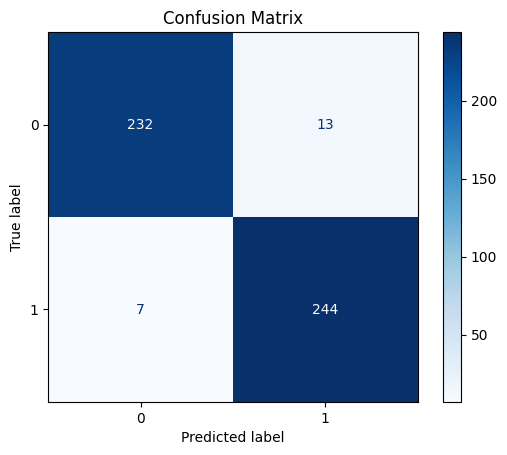

In [391]:
cm = confusion_matrix(y_test, y_pred_gb)

# 6. Display Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Visualise the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# import pickle

# with open('models/GB/gb_model.pkl','wb') as f:
#     pickle.dump(gb_clf,f)

In [ ]:
import pickle

with open('models/GB/gb_model.pkl', 'rb') as f:
    gb_clf = pickle.load(f)

# Sensitivity Analysis

### Random Forest

In [411]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [412]:
rfc_sensitivity_result = []

for i in range(200):
    rf_model = RandomForestClassifier(n_estimators=i+1)
    rf_model.fit(x_train, y_train)
    y_predictions = rf_model.predict(x_test)

    rfc_testing_score = accuracy_score(y_test, y_predictions)
    rfc_training_score = accuracy_score(y_train, rf_model.predict(x_train))

    rfc_sensitivity_result.append([rfc_testing_score, rfc_training_score])

    # print(i+1, 'iterations completed.')

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array

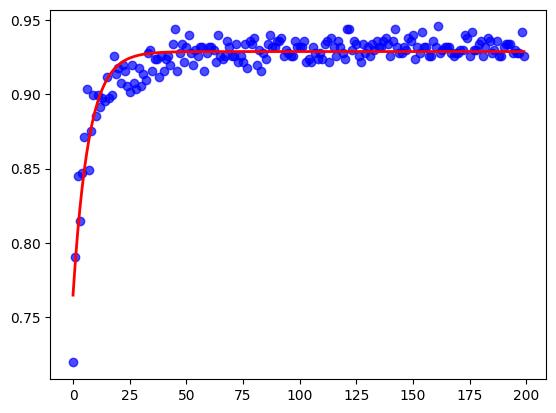

In [414]:
testing_training_accuracies = np.array(rfc_sensitivity_result)

from scipy.optimize import curve_fit

def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(testing_training_accuracies.shape[0])
ydata = testing_training_accuracies[:,0]
popt, pcov = curve_fit(model_func, xdata, ydata, p0=[1, 1, 1])
a_fit, b_fit, c_fit = popt
yfit = model_func(xdata, *popt)

plt.scatter(xdata, ydata, label='Data', color='blue', alpha=0.7)
plt.plot(xdata, yfit, label='Fitted Model', color='red', linewidth=2)

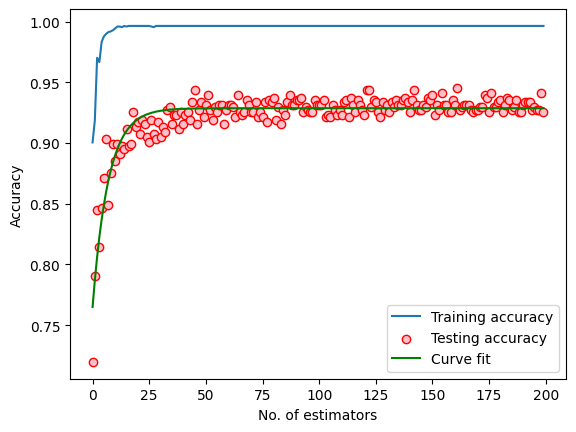

In [415]:

plt.plot(testing_training_accuracies[:,1], label='Training accuracy')
plt.scatter(np.arange(testing_training_accuracies.shape[0]),testing_training_accuracies[:,0],facecolor='pink', edgecolor = 'red', label='Testing accuracy')
# plt.plot(testing_training_accuracies[:,0], label = '_nolegend_')
plt.plot(yfit, label = 'Curve fit', color = 'green')
#plt.legend(['Training accuracy', 'Testing accuracy', 'Testing accuracy (joined)', 'Curve fit'])
plt.legend()
plt.xlabel('No. of estimators')
plt.ylabel('Accuracy')
plt.savefig('rfc_estimators_sensitivity.png', dpi=1200, bbox_inches='tight', format='png')

### Support Vector Machine

In [416]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score




In [421]:
svm_sensitivity_result = []

for i in range(10):

    svm_model = SVC(kernel='poly', degree=i+1)
    #svm_model = SVC(kernel='rbf')
    svm_model.fit(x_train,y_train)

    y_pred = svm_model.predict(x_test)

    accuracy_score(y_test, y_pred)
    accuracy_score(y_train, svm_model.predict(x_train))

    svm_testing_score = accuracy_score(y_test, y_pred)
    svm_training_score = accuracy_score(y_train, svm_model.predict(x_train))

    svm_sensitivity_result.append([svm_testing_score, svm_training_score])

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d

In [423]:
testing_training_accuracies = np.array(svm_sensitivity_result)

def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(testing_training_accuracies.shape[0])
ydata = testing_training_accuracies[:,0]
popt, pcov = curve_fit(model_func, xdata, ydata, p0=[1, 1, 1])
a_fit, b_fit, c_fit = popt
yfit = model_func(xdata, *popt)

plt.scatter(xdata, ydata, label='Data', color='blue', alpha=0.7)
plt.plot(xdata, yfit, label='Fitted Model', color='red', linewidth=2)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

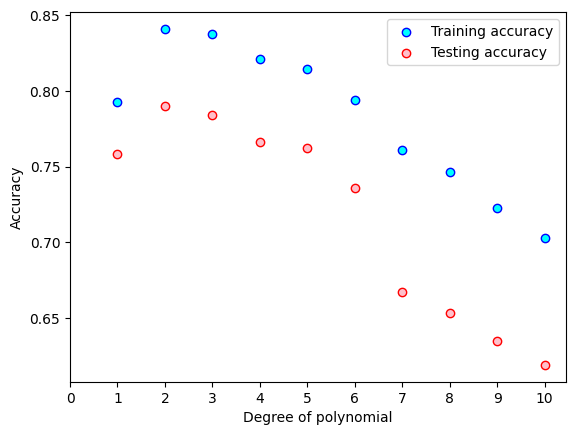

In [425]:

plt.scatter(np.arange(1,testing_training_accuracies.shape[0]+1),testing_training_accuracies[:,1],facecolor='cyan', edgecolor = 'blue', label='Training accuracy')
plt.scatter(np.arange(1,testing_training_accuracies.shape[0]+1),testing_training_accuracies[:,0],facecolor='pink', edgecolor = 'red', label='Testing accuracy')
# plt.plot(testing_training_accuracies[:,0], label = '_nolegend_')
# plt.plot(yfit, label = 'Curve fit', color = 'green')
#plt.legend(['Training accuracy', 'Testing accuracy', 'Testing accuracy (joined)', 'Curve fit'])
plt.xticks(range(0, 11))
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Accuracy')
plt.savefig('svm_polynomialdegree_sensitivity.png', dpi=1200, bbox_inches='tight', format='png')

In [426]:
pd.DataFrame(testing_training_accuracies, columns = ['testset','trainset']).to_csv('polynomial_kernel_accuracies.csv')

In [442]:
print('\\\\\n'.join([' & '.join([str(j) for j in i]) for i in testing_training_accuracies.round(4).tolist()]))

0.6714 & 0.7056\\
0.7117 & 0.746\\
0.7258 & 0.7535\\
0.7339 & 0.7556\\
0.6956 & 0.746\\
0.7238 & 0.7571\\
0.7359 & 0.7722\\
0.748 & 0.7934\\
0.744 & 0.7924\\
0.7581 & 0.802\\
0.7742 & 0.8051\\
0.7661 & 0.8141\\
0.7722 & 0.8217\\
0.7742 & 0.8212\\
0.7802 & 0.8293\\
0.7843 & 0.8374\\
0.7923 & 0.8394\\
0.7883 & 0.8424\\
0.7964 & 0.8409\\
0.8044 & 0.8465\\
0.8125 & 0.8545\\
0.8004 & 0.8535\\
0.8004 & 0.8566\\
0.8105 & 0.8626\\
0.8185 & 0.8631\\
0.8226 & 0.8611\\
0.8206 & 0.8636\\
0.8206 & 0.8652\\
0.8226 & 0.8702\\
0.8226 & 0.8758\\
0.8246 & 0.8778\\
0.8306 & 0.8783\\
0.8347 & 0.8823\\
0.8367 & 0.8843\\
0.8407 & 0.8848\\
0.8427 & 0.8843\\
0.8468 & 0.8914\\
0.8407 & 0.8914\\
0.8427 & 0.897\\
0.8387 & 0.8985\\
0.8468 & 0.9056\\
0.8508 & 0.9081\\
0.8569 & 0.9066\\
0.8548 & 0.9081\\
0.8589 & 0.9106\\
0.8569 & 0.9096\\
0.8589 & 0.9126\\
0.8609 & 0.9136\\
0.8548 & 0.9202\\
0.8589 & 0.9217\\
0.8609 & 0.9222\\
0.871 & 0.9227\\
0.873 & 0.9237\\
0.869 & 0.9263\\
0.873 & 0.9298\\
0.869 & 0.9328\\
0.8

In [431]:
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [432]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_test)

accuracy_score(y_test, y_pred)
accuracy_score(y_train, svm_model.predict(x_train))

svm_testing_score = accuracy_score(y_test, y_pred)
svm_training_score = accuracy_score(y_train, svm_model.predict(x_train))

print([svm_testing_score, svm_training_score])

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.8165322580645161, 0.8681818181818182]


In [435]:
round(svm_testing_score,4)

0.8165

In [436]:
round(svm_training_score,4)

0.8682

In [437]:
svm_model = SVC(kernel='sigmoid')
svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_test)

accuracy_score(y_test, y_pred)
accuracy_score(y_train, svm_model.predict(x_train))

svm_testing_score = accuracy_score(y_test, y_pred)
svm_training_score = accuracy_score(y_train, svm_model.predict(x_train))

print([svm_testing_score, svm_training_score])

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.6451612903225806, 0.6681818181818182]


In [439]:
round(svm_testing_score,4), round(svm_training_score,4)

(0.6452, 0.6682)

### Gradient Boosting

In [440]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [441]:
gbc_sensitivity_result = []

for i in range(1500):
    gb_clf = GradientBoostingClassifier(n_estimators=i+1, learning_rate=0.1, max_depth=3)
    gb_clf.fit(x_train, y_train)
    y_pred = gb_clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, gb_clf.predict(x_train))
    gbc_sensitivity_result.append([test_accuracy, train_accuracy])

testing_training_accuracies = np.array(gbc_sensitivity_result)

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

/var/folders/0m/0ksqrzfj5_xbpz3ypb8mghy80000gn/T/ipykernel_60086/3895570430.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


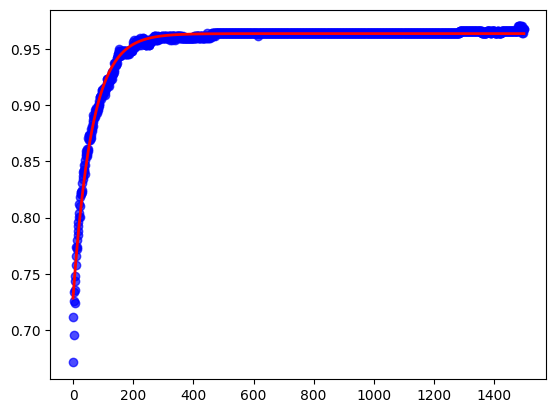

In [443]:
testing_training_accuracies = np.array(gbc_sensitivity_result)

from scipy.optimize import curve_fit

def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(testing_training_accuracies.shape[0])
ydata = testing_training_accuracies[:,0]
popt, pcov = curve_fit(model_func, xdata, ydata, p0=[1, 1, 1])
a_fit, b_fit, c_fit = popt
yfit = model_func(xdata, *popt)

plt.scatter(xdata, ydata, label='Data', color='blue', alpha=0.7)
plt.plot(xdata, yfit, label='Fitted Model', color='red', linewidth=2)

In [143]:
gbc_sensitivity_result2 = []

for i in range(0, 1000):
    gb_clf = GradientBoostingClassifier(n_estimators=i+1, learning_rate=0.1, max_depth=3)
    gb_clf.fit(x_train, y_train)
    y_pred = gb_clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, gb_clf.predict(x_train))
    gbc_sensitivity_result2.append([test_accuracy, train_accuracy])

#testing_training_accuracies = np.array(gbc_sensitivity_result2)

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

In [149]:
len(gbc_sensitivity_result[-500:])

500

/var/folders/0m/0ksqrzfj5_xbpz3ypb8mghy80000gn/T/ipykernel_1268/275860016.py:6: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


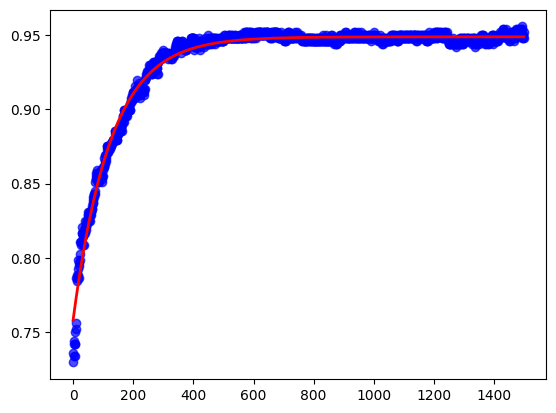

In [150]:
testing_training_accuracies = np.array(gbc_sensitivity_result2 + gbc_sensitivity_result[-500:])

from scipy.optimize import curve_fit

def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(testing_training_accuracies.shape[0])
ydata = testing_training_accuracies[:,0]
popt, pcov = curve_fit(model_func, xdata, ydata, p0=[1, 1, 1])
a_fit, b_fit, c_fit = popt
yfit = model_func(xdata, *popt)

plt.scatter(xdata, ydata, label='Data', color='blue', alpha=0.7)
plt.plot(xdata, yfit, label='Fitted Model', color='red', linewidth=2)

/var/folders/0m/0ksqrzfj5_xbpz3ypb8mghy80000gn/T/ipykernel_1268/4179148442.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


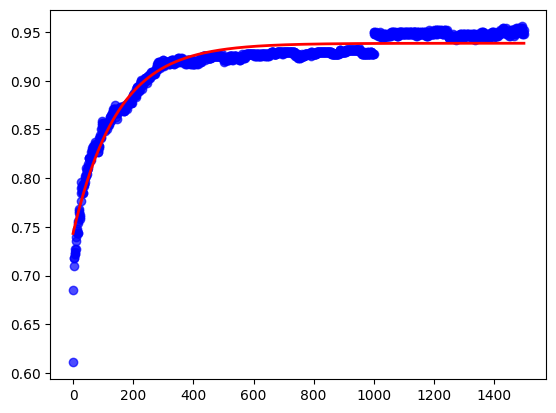

In [141]:
from scipy.optimize import curve_fit

def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(testing_training_accuracies.shape[0])
ydata = testing_training_accuracies[:,0]
popt, pcov = curve_fit(model_func, xdata, ydata, p0=[1, 1, 1])
a_fit, b_fit, c_fit = popt
yfit = model_func(xdata, *popt)

plt.scatter(xdata, ydata, label='Data', color='blue', alpha=0.7)
plt.plot(xdata, yfit, label='Fitted Model', color='red', linewidth=2)

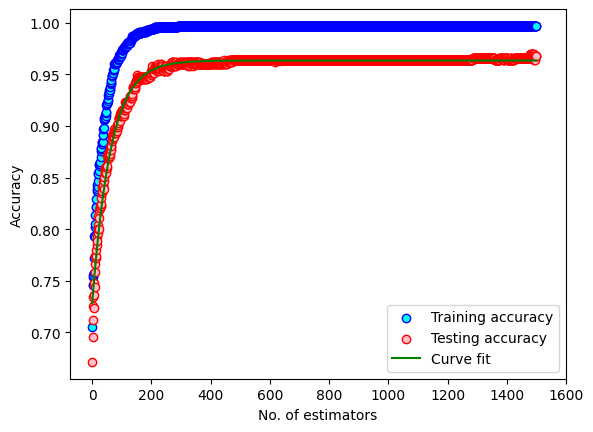

In [444]:
#plt.plot(testing_training_accuracies[:,1], label='Training accuracy')
plt.scatter(np.arange(testing_training_accuracies.shape[0]),testing_training_accuracies[:,1],facecolor='cyan', edgecolor = 'blue', label='Training accuracy')
plt.scatter(np.arange(testing_training_accuracies.shape[0]),testing_training_accuracies[:,0],facecolor='pink', edgecolor = 'red', label='Testing accuracy')
# plt.plot(testing_training_accuracies[:,0], label = '_nolegend_')
plt.plot(yfit, label = 'Curve fit', color = 'green')
#plt.legend(['Training accuracy', 'Testing accuracy', 'Testing accuracy (joined)', 'Curve fit'])
plt.xticks(range(0, 1500+100+1, 200))
plt.legend()
plt.xlabel('No. of estimators')
plt.ylabel('Accuracy')
plt.savefig('estimators_saturation.png', dpi=1200, bbox_inches='tight', format='png')

### Principal Component Analysis

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [52]:
x_data = []
y_data = []
for i in range(len(all_values)):
    x_data.append(all_values[i][0].tolist()+all_values[i][1].tolist()+[all_values[i][3],all_values[i][4]])
    y_data.append([all_values[i][2]]+[all_values[i][3],all_values[i][4]])

x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

pca_performance_list = []

for i in range(1,500+1):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

    pca = PCA(n_components=i)
    principal_components = pca.fit_transform(scaled_data)

    x_data_values = principal_components
    y_data_values = y_data.iloc[:,:1]



    shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
    test_size = 0.2
    train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
    train_indices = shuffled_indices[:train_cursor]
    test_indices = shuffled_indices[train_cursor:]

    x_train = pd.DataFrame(x_data_values[train_indices,:])
    y_train = y_data_values.iloc[train_indices,:]

    x_test = pd.DataFrame(x_data_values[test_indices,:])
    y_test = y_data_values.iloc[test_indices,:]

    

    svm_model = SVC(kernel='rbf')
    svm_model.fit(x_train,y_train)

    y_pred = svm_model.predict(x_test)

    accuracy_score(y_test, y_pred)
    accuracy_score(y_train, svm_model.predict(x_train))

    svm_testing_score = accuracy_score(y_test, y_pred)
    svm_training_score = accuracy_score(y_train, svm_model.predict(x_train))

    #print([svm_testing_score, svm_training_score])

    pca_performance_list.append([svm_testing_score, svm_training_score])
    

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d

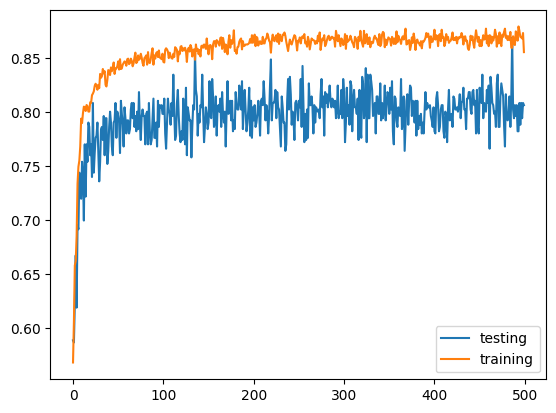

In [53]:
plt.plot(np.array(pca_performance_list))
plt.legend(['testing', 'training'])

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
x_data = []
y_data = []
for i in range(len(all_values)):
    x_data.append(all_values[i][0].tolist()+all_values[i][1].tolist()+[all_values[i][3],all_values[i][4]])
    y_data.append([all_values[i][2]]+[all_values[i][3],all_values[i][4]])

x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

pca_performance_list = []

for i in range(1,500+1):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

    pca = PCA(n_components=i)
    principal_components = pca.fit_transform(scaled_data)

    x_data_values = principal_components
    y_data_values = y_data.iloc[:,:1]



    shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
    test_size = 0.2
    train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
    train_indices = shuffled_indices[:train_cursor]
    test_indices = shuffled_indices[train_cursor:]

    x_train = pd.DataFrame(x_data_values[train_indices,:])
    y_train = y_data_values.iloc[train_indices,:]

    x_test = pd.DataFrame(x_data_values[test_indices,:])
    y_test = y_data_values.iloc[test_indices,:]

    



    rf_model = RandomForestClassifier(n_estimators=25)
    rf_model.fit(x_train, y_train)
    y_predictions = rf_model.predict(x_test)
    y_train_predictions = rf_model.predict(x_train)

    rf_testing_score = accuracy_score(y_test, y_predictions)
    rf_training_score = accuracy_score(y_train, y_train_predictions)

    #print([svm_testing_score, svm_training_score])

    pca_performance_list.append([rf_testing_score, rf_training_score])
    

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array

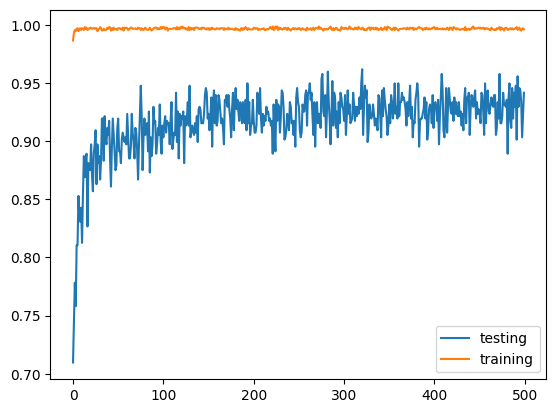

In [58]:
plt.plot(np.array(pca_performance_list))
plt.legend(['testing', 'training'])

### Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [ ]:
x_data = []
y_data = []
for i in range(len(all_values)):
    x_data.append(all_values[i][0].tolist()+all_values[i][1].tolist()+[all_values[i][3],all_values[i][4]])
    y_data.append([all_values[i][2]]+[all_values[i][3],all_values[i][4]])

x_data = pd.DataFrame(x_data)
y_data = pd.DataFrame(y_data)

pca_performance_list = []

for i in range(1,500+1):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

    pca = PCA(n_components=i)
    principal_components = pca.fit_transform(scaled_data)

    x_data_values = principal_components
    y_data_values = y_data.iloc[:,:1]



    shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
    test_size = 0.2
    train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
    train_indices = shuffled_indices[:train_cursor]
    test_indices = shuffled_indices[train_cursor:]

    x_train = pd.DataFrame(x_data_values[train_indices,:])
    y_train = y_data_values.iloc[train_indices,:]

    x_test = pd.DataFrame(x_data_values[test_indices,:])
    y_test = y_data_values.iloc[test_indices,:]

    



    gb_clf = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=4)
    gb_clf.fit(x_train, y_train)
    y_test_predictions = gb_clf.predict(x_test)
    y_train_predictions = gb_clf.predict(x_train)

    gb_testing_score = accuracy_score(y_test, y_test_predictions)
    gb_training_score = accuracy_score(y_train, y_train_predictions)

    #print([svm_testing_score, svm_training_score])

    pca_performance_list.append([gb_testing_score, gb_training_score])
    

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

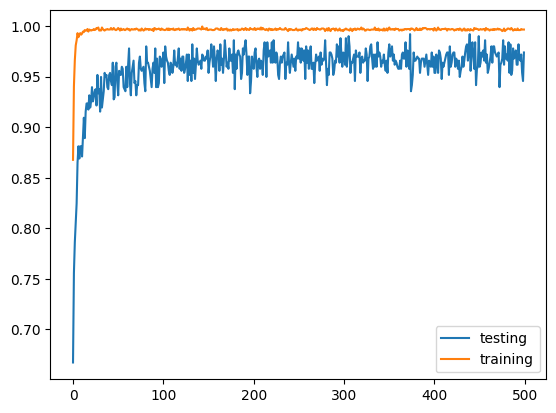

In [64]:
plt.plot(np.array(pca_performance_list))
plt.legend(['testing', 'training'])

In [ ]:
# model = tf.keras.models.load_model('models/ANN/ann_model.keras')

In [43]:
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

number_of_input_neurons = x_train.shape[1]



In [40]:
def generate_model(input_image_shape, l, n):
    inputs = tf.keras.layers.Input(shape=input_image_shape)
    x = tf.keras.layers.Dense(n, activation = 'sigmoid')(inputs)
    for _ in range(l-1):
        x = tf.keras.layers.Dense(n, activation = 'sigmoid')(x)
    outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
    return tf.keras.Model(inputs, outputs, name="U-Net_with_Attention_Gate")



In [44]:
model.evaluate(x_data_values,y_data_values)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.7890 - loss: 0.4614 


[0.46476808190345764, 0.7924070954322815]

In [45]:
x_data_values.shape

(2476, 200)

In [47]:
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

number_of_input_neurons = x_train.shape[1]




ann_sens_list = []

for i in range(1,20+1):

    model = generate_model((number_of_input_neurons,), i, 16)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                patience=10,  # Number of epochs with no improvement after which training will be stopped
                                restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
                                mode='min')  # 'min' to stop when the monitored metric decreases

    history_ann2 = model.fit(x_train,y_train,epochs=200, validation_split = 0.2, callbacks=[early_stopping], verbose=False)

    ann_sens_list.append([model.evaluate(x_train,y_train)[1], model.evaluate(x_test,y_test)[1]])

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9098 - loss: 0.2672
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4545 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8691 - loss: 0.3344
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7833 - loss: 0.4732 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8756 - loss: 0.3503
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7843 - loss: 0.4845 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.8559 - loss: 0.4110
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7895 - loss: 0.5031 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8709 - loss: 0.3977
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.5124 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.8650 - loss: 0.4314
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7570 - loss: 0.5271 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8616 - loss: 0.4071
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1

Text(0, 0.5, 'Accuracy')

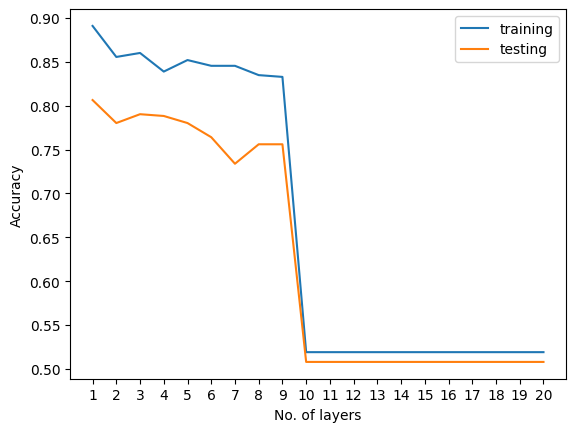

In [48]:
x_vals = list(range(1,len(ann_sens_list)+1))
plt.plot(x_vals, np.array(ann_sens_list))
plt.xticks(x_vals)
plt.legend(['training', 'testing'])
plt.xlabel('No. of layers')
plt.ylabel('Accuracy')

In [213]:
x_train.to_numpy().shape

(1980, 200)

In [214]:
x_test.to_numpy().shape

(496, 200)

In [212]:
np.r_[x_train.to_numpy(),x_test.to_numpy()].shape

(2476, 200)

In [246]:
# shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
# test_size = 0.2
# train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
# train_indices = shuffled_indices[:train_cursor]
# test_indices = shuffled_indices[train_cursor:]

# x_train = pd.DataFrame(x_data_values[train_indices,:])
# y_train = y_data_values.iloc[train_indices,:]

# x_test = pd.DataFrame(x_data_values[test_indices,:])
# y_test = y_data_values.iloc[test_indices,:]

number_of_input_neurons = x_train.shape[1]

ann_sens_list_neur = []

for i in range(1,200+1):

    model = generate_model((number_of_input_neurons,), 2, i)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                patience=10,  # Number of epochs with no improvement after which training will be stopped
                                restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
                                mode='min')  # 'min' to stop when the monitored metric decreases

    history_ann2 = model.fit(x_train,y_train,epochs=200, validation_split = 0.2, callbacks=[early_stopping], verbose=False)

    ann_sens_list_neur.append([model.evaluate(x_train,y_train)[1], model.evaluate(x_test,y_test)[1]])

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.8758 - loss: 0.4201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7556 - loss: 0.5518 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8592 - loss: 0.4018 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7274 - loss: 0.5246 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8842 - loss: 0.3243
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7856 - loss: 0.5095 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8738 - loss: 0.3561
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7271 - loss: 0.5599 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9046 - loss: 0.2862
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7602 - loss: 0.5666 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9023 - loss: 0.2982
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7746 - loss: 0.5073 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9354 - loss: 0.2206
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

Text(0, 0.5, 'Accuracy')

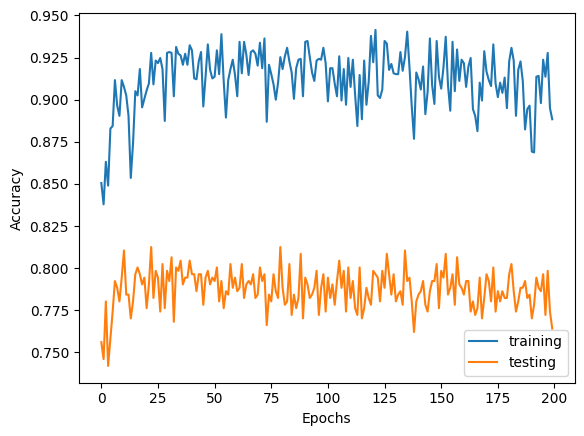

In [257]:
plt.plot(np.array(ann_sens_list_neur))
plt.legend(['training', 'testing'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
plt.scatter(np.arange(testing_training_accuracies.shape[0]),testing_training_accuracies[:,1],facecolor='cyan', edgecolor = 'blue', label='Training accuracy')
plt.scatter(np.arange(testing_training_accuracies.shape[0]),testing_training_accuracies[:,0],facecolor='pink', edgecolor = 'red', label='Testing accuracy')
plt.plot(yfit, label = 'Curve fit', color = 'green')
plt.xticks(range(0, 1500+100+1, 200))
plt.legend()
plt.xlabel('No. of estimators')
plt.ylabel('Accuracy')
plt.savefig('estimators_saturation.png', dpi=1200, bbox_inches='tight', format='png')

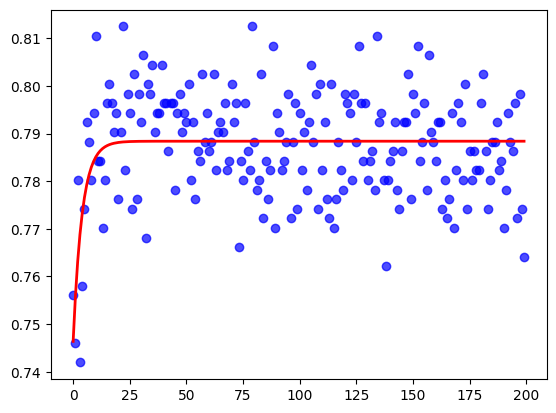

In [260]:
from scipy.optimize import curve_fit

def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.arange(np.array(ann_sens_list_neur).shape[0])
ydata = np.array(ann_sens_list_neur)[:,1]
popt, pcov = curve_fit(model_func, xdata, ydata, p0=[1, 1, 1])
a_fit, b_fit, c_fit = popt
yfit = model_func(xdata, *popt)

plt.scatter(xdata, ydata, label='Data', color='blue', alpha=0.7)
plt.plot(xdata, yfit, label='Fitted Model', color='red', linewidth=2)

Text(0, 0.5, 'Accuracy')

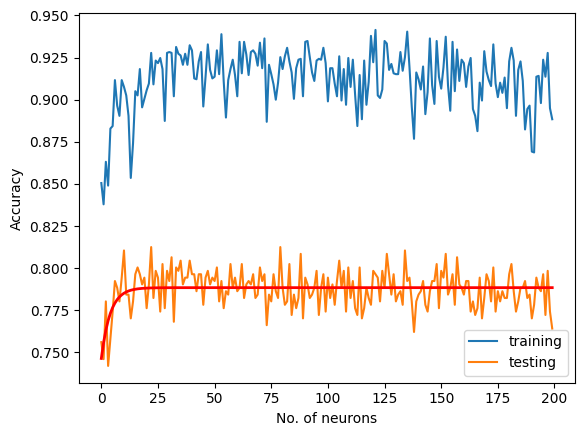

In [262]:
plt.plot(np.array(ann_sens_list_neur))
plt.plot(xdata, yfit, label='Fitted Model', color='red', linewidth=2)
plt.legend(['training', 'testing'])
plt.xlabel('No. of neurons')
plt.ylabel('Accuracy')

In [250]:
# shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
# test_size = 0.2
# train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
# train_indices = shuffled_indices[:train_cursor]
# test_indices = shuffled_indices[train_cursor:]

# x_train = pd.DataFrame(x_data_values[train_indices,:])
# y_train = y_data_values.iloc[train_indices,:]

# x_test = pd.DataFrame(x_data_values[test_indices,:])
# y_test = y_data_values.iloc[test_indices,:]

# number_of_input_neurons = x_train.shape[1]




ann_sens_list_verif = []

for i in range(1,20+1):

    model = generate_model((number_of_input_neurons,), i, 50)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                patience=10,  # Number of epochs with no improvement after which training will be stopped
                                restore_best_weights=True,  # Restore model weights from the epoch with the best validation loss
                                mode='min')  # 'min' to stop when the monitored metric decreases

    history_ann2 = model.fit(x_train,y_train,epochs=200, validation_split = 0.2, callbacks=[early_stopping], verbose=False)

    ann_sens_list_verif.append([model.evaluate(x_train,y_train)[1], model.evaluate(x_test,y_test)[1]])

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9609 - loss: 0.1594
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7803 - loss: 0.5177 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.9534 - loss: 0.1784
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7799 - loss: 0.5038 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9159 - loss: 0.2419
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7620 - loss: 0.5318 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9302 - loss: 0.2295
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7767 - loss: 0.5295 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9253 - loss: 0.2488
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7751 - loss: 0.5509 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8803 - loss: 0.3454
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7640 - loss: 0.5527 
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.8952 - loss: 0.3361
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1

Text(0, 0.5, 'Accuracy')

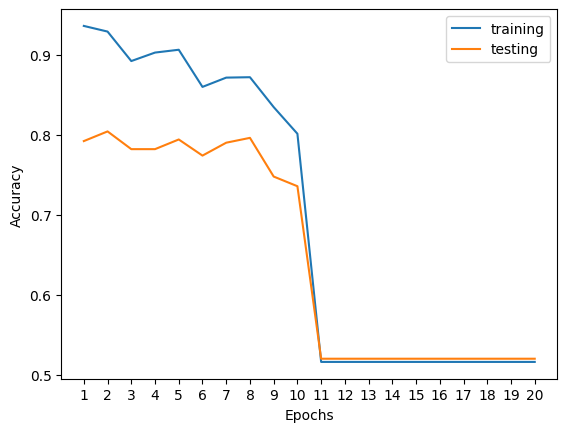

In [256]:
x_vals = list(range(1,len(ann_sens_list_verif)+1))
plt.plot(x_vals, np.array(ann_sens_list_verif))
plt.xticks(x_vals)
plt.legend(['training', 'testing'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# K-Fold cross validation

In [50]:
k_folds = 3

### SVM

In [80]:
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

number_of_input_neurons = x_train.shape[1]


In [81]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

kf = KFold(n_splits=k_folds, shuffle=True)

model_svm = SVC(kernel='rbf')

# Evaluate using cross_val_score
scores = cross_val_score(model_svm, x_data_values, y_data_values, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores: [0.79903148 0.8        0.80242424]
Mean accuracy: 0.8004852398072737


In [76]:
x_data_values.shape

(2476, 200)

### RF

In [86]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=k_folds, shuffle=True)

model_rf = RandomForestClassifier(n_estimators=50)

# Evaluate using cross_val_score
scores = cross_val_score(model_rf, x_data_values, y_data_values, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Cross-validation scores: [0.89830508 0.89818182 0.92      ]
Mean accuracy: 0.9054956343091937


### GB

In [51]:
k_folds

3

In [52]:
k_folds = 5

In [53]:


from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

kf = KFold(n_splits=k_folds, shuffle=True)

model_gb = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=3)

# Evaluate using cross_val_score
scores = cross_val_score(model_gb, x_data_values, y_data_values, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Cross-validation scores: [0.96169355 0.96767677 0.96969697 0.97979798 0.95757576]
Mean accuracy: 0.9672882046269142


In [54]:
kf = KFold(n_splits=k_folds, shuffle=True)

In [60]:
mean_accuracies = []
for i in range(10):
    model_gb = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=i+1)
    scores = cross_val_score(model_gb, x_data_values, y_data_values, cv=kf, scoring='accuracy')
    mean_accuracies.append(scores.mean())
    print('Max-depth',i+1,"Cross-validation scores:", scores,"Mean accuracy:", scores.mean())


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 1 Cross-validation scores: [0.83266129 0.87474747 0.85454545 0.87070707 0.85050505] Mean accuracy: 0.8566332681655263


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 2 Cross-validation scores: [0.94758065 0.95959596 0.93939394 0.95757576 0.94545455] Mean accuracy: 0.9499201694362984


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 3 Cross-validation scores: [0.95766129 0.95757576 0.94141414 0.98181818 0.96565657] Mean accuracy: 0.9608251873574453


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 4 Cross-validation scores: [0.95564516 0.96969697 0.95959596 0.96161616 0.95959596] Mean accuracy: 0.9612300423590746


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 5 Cross-validation scores: [0.96572581 0.96363636 0.96969697 0.95959596 0.95959596] Mean accuracy: 0.963650211795373


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 6 Cross-validation scores: [0.95967742 0.96969697 0.96161616 0.97777778 0.97373737] Mean accuracy: 0.9685011404366243


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 7 Cross-validation scores: [0.98185484 0.97575758 0.95555556 0.94949495 0.95353535] Mean accuracy: 0.9632396546106223


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 8 Cross-validation scores: [0.94959677 0.97575758 0.96363636 0.96767677 0.97777778] Mean accuracy: 0.9668890518084066


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 9 Cross-validation scores: [0.97177419 0.98585859 0.94343434 0.96969697 0.97171717] Mean accuracy: 0.9684962528510915


/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was pass

Max-depth 10 Cross-validation scores: [0.96774194 0.96767677 0.96363636 0.95353535 0.96767677] Mean accuracy: 0.9640534376018246


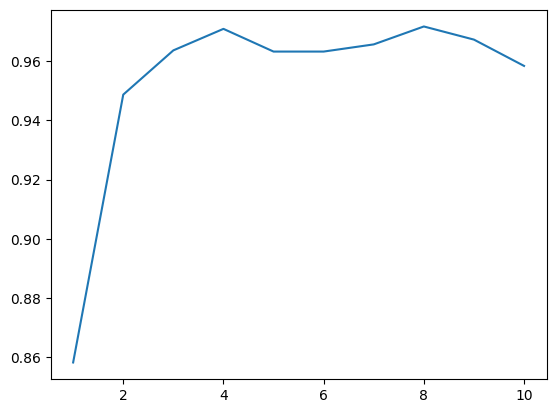

In [57]:
plt.plot(range(1,len(mean_accuracies)+1),mean_accuracies)